# TRABAJO PRÁCTICO Nº 4

**Alumnos:**
- Nahuel Arrieta
- Lucas moyano

In [33]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def read_image(image_name):
  image_path = "./images/" + image_name

  # Read the image
  image = cv2.imread(image_path)
  if image is None:
    sys.exit("Could not read the image " + image_path)
  return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [35]:
def show_image(label, image):
  ## Create a plot
  plt.imshow(image, cmap='gray')
  plt.title(label)
  plt.axis('off')
  plt.show()

## Sección 1: Transformada de Fourier

### 1. Transformada de Fourier (FT) en 2D: Realiza la transformada de Fourier de una imagen en escala de grises utilizando la funci´on fft2 de NumPy. Muestra la imagen original y su transformada de Fourier (usando imshow de Matplotlib).

### 2. Centro de la Transformada de Fourier: Centra la transformada de Fourier de una imagen usando fftshift. Muestra la imagen original y su transformada centrada.

### 3. Magnitud y fase: Extrae y muestra la magnitud y fase de la transformada de Fourier centrada. Muestra las im´agenes de la magnitud y la fase por separado.


In [36]:
def fourier_transform(image):
    ## Convert to grayscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    ## Apply Fourier Transform
    f_transform = np.fft.fft2(image)

    ## Shift the zero frequency component to the center
    f_transform = np.fft.fftshift(f_transform)

    ## Calculate the magnitude spectrum
    magnitude = np.abs(f_transform)

    ## Calculate the phase spectrum
    phase = np.angle(f_transform)
    
    return magnitude, phase

In [37]:
def plot_fourier(label, magnitude, phase):
    magnitude = np.log(1 + magnitude)
    phase = (phase + np.pi) / (2 * np.pi) * 255

    magnitude = np.uint8(magnitude)
    phase = np.uint8(phase)

    show_image("Magnitude Spectrum " + label, magnitude)
    show_image("Phase Spectrum " + label, phase)

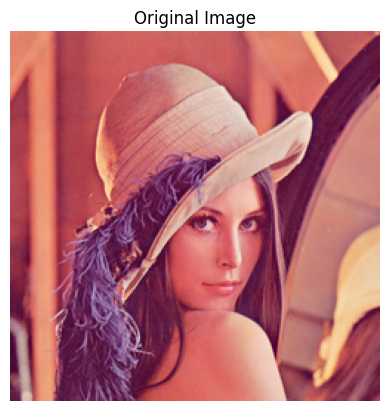

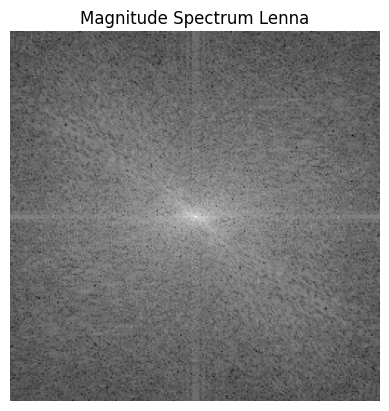

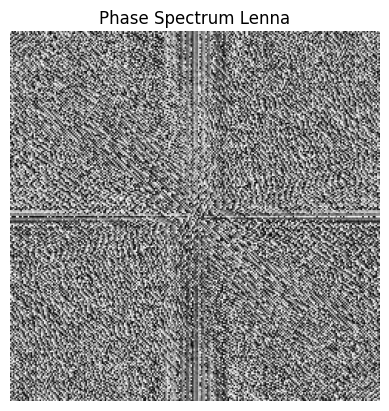

In [38]:
image = read_image("Lenna.png")
magnitude, phase = fourier_transform(image)
show_image("Original Image", image)
plot_fourier("Lenna", magnitude, phase)


### 4. Filtro pasa bajos ideal: Aplica un filtro pasa bajos ideal en el dominio frecuencial para suprimir altas frecuencias. Muestra la imagen original y la imagen filtrada en el dominio frecuencial.

In [41]:
def inverse_fourier_transform(magnitude, phase):
    # Reconstruct the complex spectrum
    f_reconstructed = magnitude * np.exp(1j * phase)

    # Shift the zero frequency component back to the original position
    f_reconstructed = np.fft.ifftshift(f_reconstructed)

    # Apply inverse Fourier Transform
    image_reconstructed_complex = np.fft.ifft2(f_reconstructed)

    # Get the real part (or absolute value)
    image_reconstructed = np.abs(image_reconstructed_complex)

    # Normalize the image to the range [0, 255]
    image_reconstructed = cv2.normalize(image_reconstructed, None, 0, 255, cv2.NORM_MINMAX)

    return np.uint8(image_reconstructed)


In [44]:
def ideal_low_pass_filter(magnitude, cutoff):
    # Create a mask with the same shape as the magnitude spectrum
    rows, cols = magnitude.shape
    center_row, center_col = rows // 2, cols // 2
    y, x = np.ogrid[:rows, :cols]
    mask = (x - center_col) ** 2 + (y - center_row) ** 2 <= cutoff ** 2

    # Apply the mask to the magnitude spectrum
    filtered_magnitude = magnitude * mask

    return filtered_magnitude


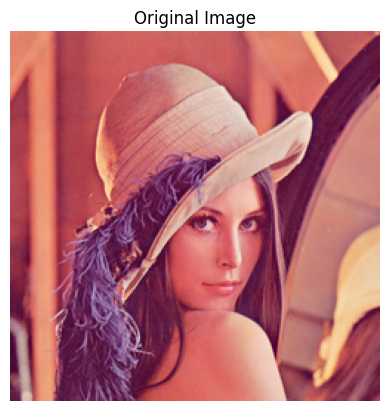

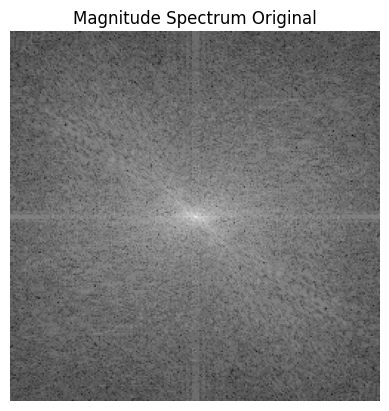

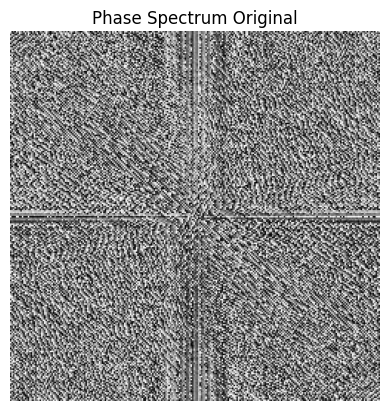

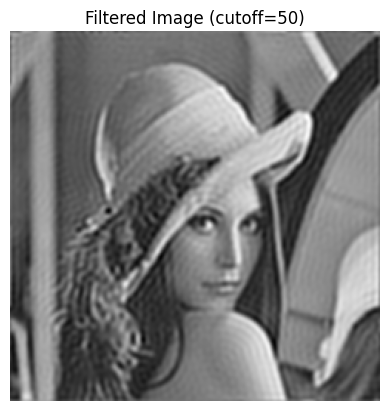

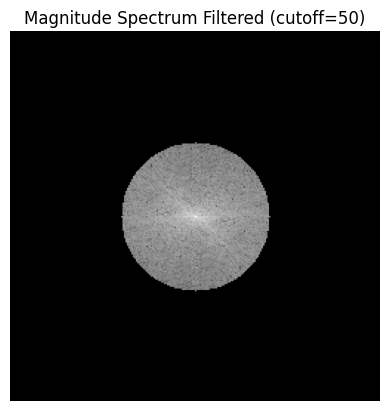

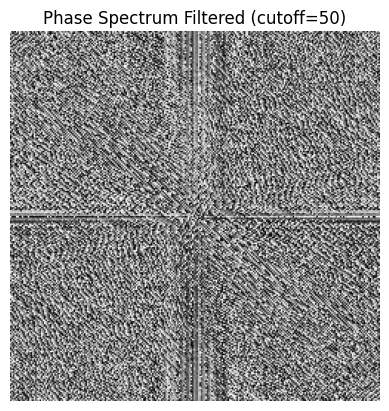

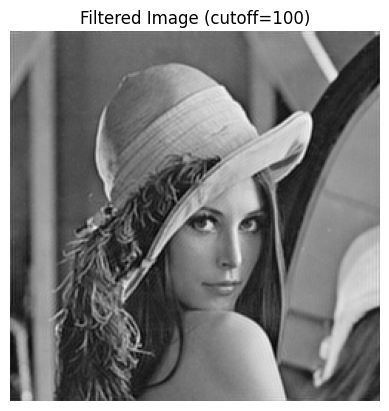

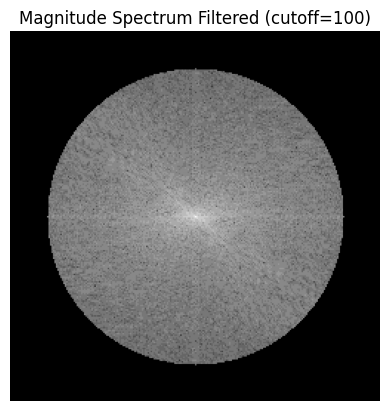

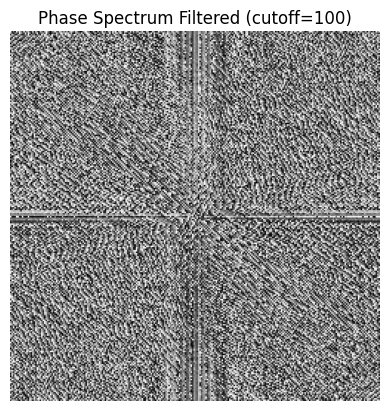

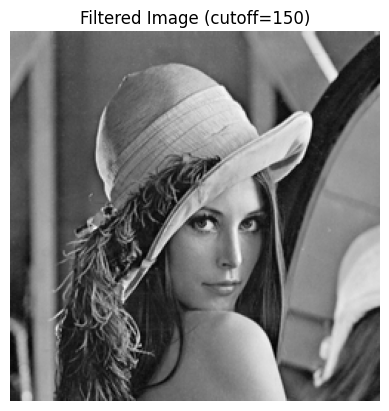

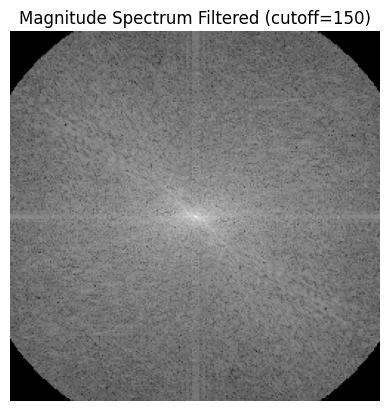

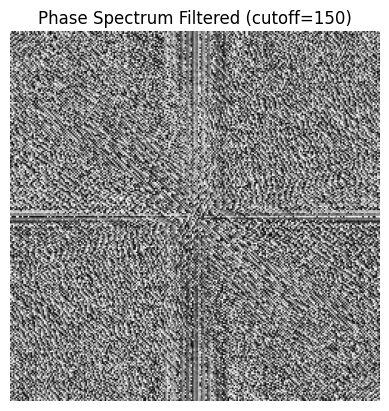

In [50]:
image = read_image("Lenna.png")
magnitude, phase = fourier_transform(image)

show_image("Original Image", image)
plot_fourier("Original", magnitude, phase)

cutoff_values = [50, 100, 150]
for cutoff in cutoff_values:
    filtered_magnitude = ideal_low_pass_filter(magnitude, cutoff)
    filtered_phase = phase
    image_reconstructed = inverse_fourier_transform(filtered_magnitude, filtered_phase)
    show_image("Filtered Image (cutoff=" + str(cutoff) + ")", image_reconstructed)
    plot_fourier("Filtered (cutoff=" + str(cutoff) + ")", filtered_magnitude, filtered_phase)


### 5. Filtro pasa bajos gaussiano: Implementa un filtro pasa bajos gaussiano y apl´ıcalo a la transformada de Fourier de una imagen. Compara la imagen original y la imagen filtrada.

In [ ]:
def gauss_low_pass_filter(magnitude, cutoff):
    # Create a Gaussian mask
    rows, cols = magnitude.shape
    center_row, center_col = rows // 2, cols // 2
    y, x = np.ogrid[:rows, :cols]
    mask = np.exp(-((x - center_col) ** 2 + (y - center_row) ** 2) / (2 * cutoff ** 2))

    # Apply the mask to the magnitude spectrum
    filtered_magnitude = magnitude * mask

    return filtered_magnitude

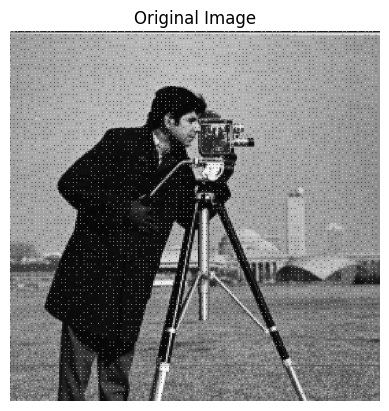

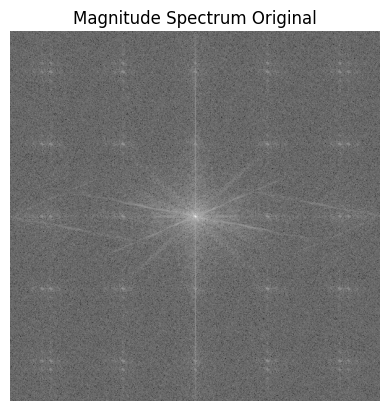

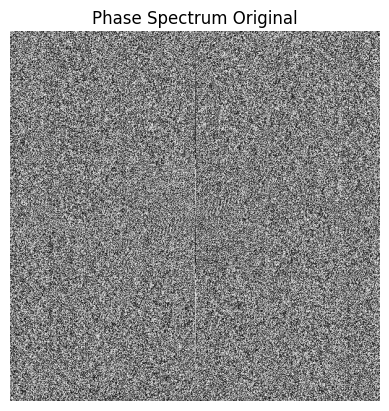

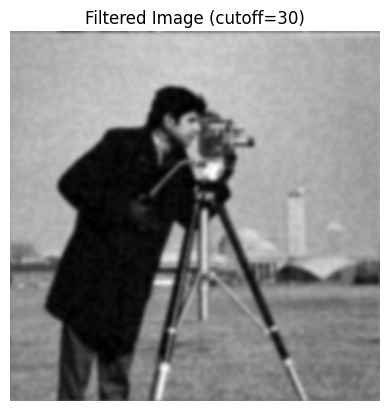

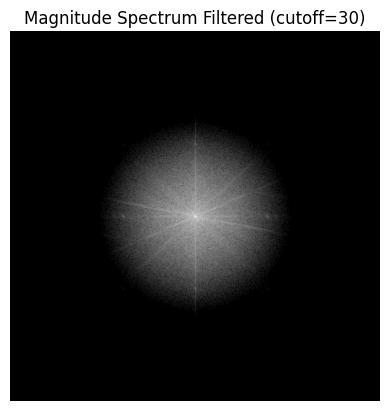

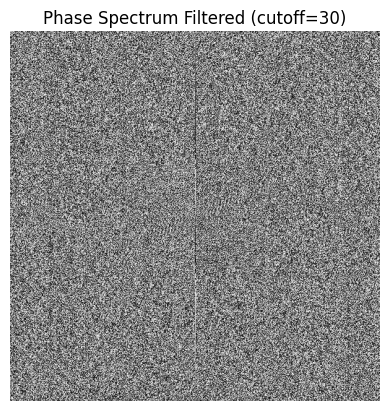

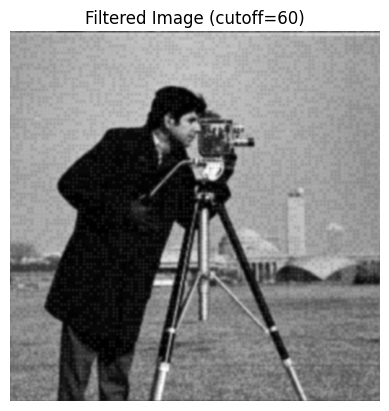

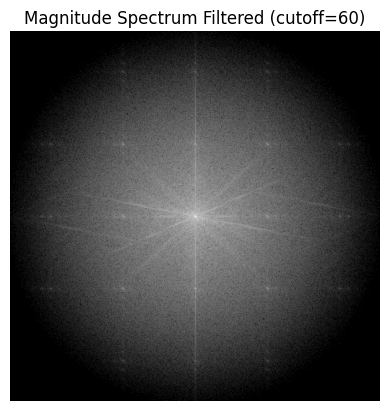

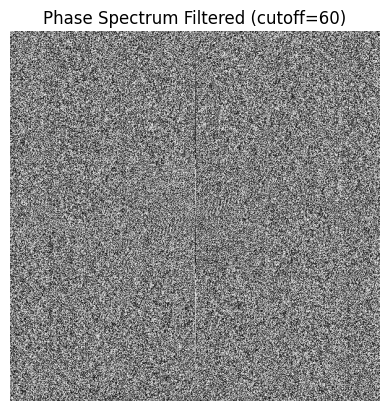

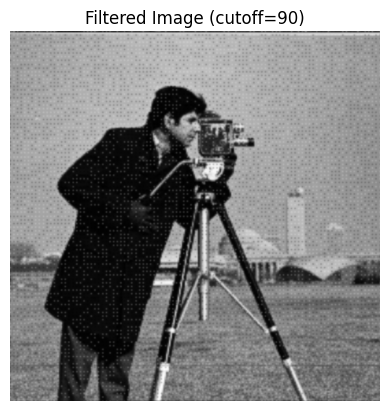

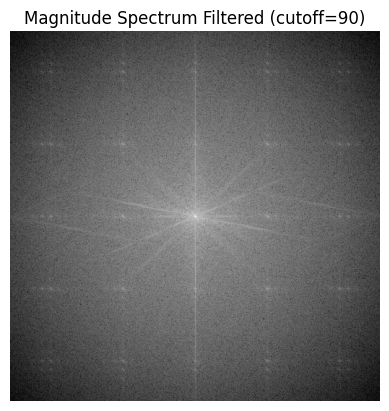

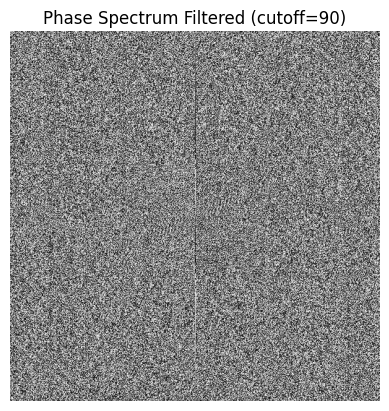

In [56]:
image = read_image("cameraman-salt-pepper.png")
magnitude, phase = fourier_transform(image)

show_image("Original Image", image)
plot_fourier("Original", magnitude, phase)

cutoff_values = [30, 60, 90]
for cutoff in cutoff_values:
    filtered_magnitude = gauss_low_pass_filter(magnitude, cutoff)
    filtered_phase = phase
    image_reconstructed = inverse_fourier_transform(filtered_magnitude, filtered_phase)
    show_image("Filtered Image (cutoff=" + str(cutoff) + ")", image_reconstructed)
    plot_fourier("Filtered (cutoff=" + str(cutoff) + ")", filtered_magnitude, filtered_phase)